# Developing the Transport Equations (I)

## Flux Equations

It is important to remember that flux has to do with *movement*, so it
is represented by a *vector* or *tensor* quantity which has magnitude
and direction(s). The underlying principle for the following equations
is the intuitive notion that nature *does not* like highly concentrated
pockets of energy, so it finds mechanisms to distribute the energy.
There are mathematically precise ways of defining how nature \"does not
like\" high energy states, but this mathematical baggage will be
abandoned by simply taking this preference of nature as a fundamental
principle. For those who are interested, a mathematical overview of this
principle is discussed in Appendix 4.

### Fick's Law of Diffusion (Mass Transport)

If we have a solution with some concentration, $C$, how can we quantify
the way the mass distribute will itself throughout the system? We know
that the system seeks to move towards equilibrium, which means that
there is no <ins>net</ins> flux of concentration in the system. This
must mean that the distribution of concentration is \"smoothed out\" and
there are no local spots of high or low concentration. If we had a
localized spot of high concentration, we should expect that the system
would seek to move this spot to a region of lower concentration to
achieve equilibrium. This movement is described by the flux,
$\mathbf{J}$, of the concentration, $C$,

$$\ \boldsymbol{\varphi}=\mathbf{J}=-D\nabla C.$$ 

Recall that the gradient points in the direction of greatest increase and the negative gradient
points in the steepest descent direction. Therefore, this simply states
that the flux, $\mathbf{J}$, moves towards the <ins>steepest
descent</ins> direction, or towards the lowest concentrations.
Based on what we previously argued, this is intuitive, the mass flows
from high concentrations to low concentrations to achieve equilibrium.
$D$ simply measures the tendency for the mass to move based on how large
the gradient is.

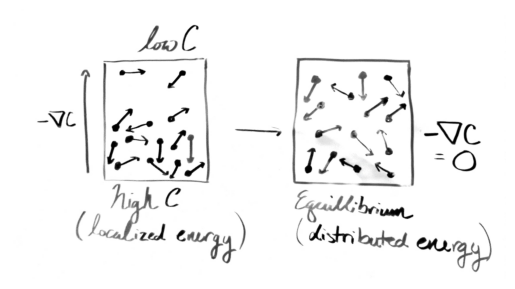

In [2]:
from matplotlib import pyplot as plt
plt.imshow(plt.imread('Images/Diffusion_exp.jpg'))
plt.axis('off')
plt.show()

Microscopically, high concentrations means that there are a lot of
intermolecular forces acting in a concentrated area. This means there is
a lot of kinetic and internal energy concentrated in one spot. By our
underlying principle, nature wishes to avoid this concentrated energy
and it distributes the energy to low concentration areas through the
mechanism of random molecular motion.

To further this energy argument, Fick's Law can be recasted in terms of
the chemical potential energy, $\mu$. First consider an ideal gas,

$$\ P=\frac{n}{V}RT,$$

using $C=n/V$,

$$\ P=CRT.$$ 

Thus, Fick's Law
becomes (at constant $T$), 

$$\ \mathbf{J}=-\frac{D}{RT}\nabla P.$$

Using the thermodynamic relation, 

$$\begin{aligned}
\nabla\mu &= RT\nabla\ln{\left(P\right)}\\
&\\
&=\frac{RT}{P}\nabla P\\
&\\
&=\frac{1}{C}\nabla P
\end{aligned}$$ 

we now have, 

$$\ \mathbf{J}=-\frac{DC}{RT}\nabla \mu.$$

This states that the flux of a chemical species occurs due to the
difference in chemical potential and the flux moves towards the regions
of lowest chemical potential. Thus, equilibrium is achieved when there
is no chemical potential gradient and the energy is distributed. While
this derivation was for an ideal gas, this argument can be extended to a
real gas by replacing $P$ with the fugacity, $f$.

$$\ \mathbf{J}=-\frac{D}{RT}\nabla f.$$

### Newton's Law of Viscosity (Momentum Transport)

Newton's Law of Viscosity states that the flux of momentum, which we
call the stress, $\boldsymbol{\tau}$, is proportional to the velocity (momentum)
gradient. Or in other words, for an incompressible fluid,

$$\ \text{1D:}\quad -\boldsymbol{\varphi}=\tau=\mu\displaystyle \dfrac{d^{}u}{dy^{}},$$

$$\ \text{General:}\quad-\boldsymbol{\varphi}=\boldsymbol{\tau}=\mu\left(\nabla\mathbf{u}+\left(\nabla\mathbf{u}\right)^{\mathrm{T}}\right) \quad \text{(Difficult!)},$$

where the negative sign for the flux is for convention. These relations
seem more complicated, but they are saying the *same* thing as Fick's
Law. Nature wishes to go from a state of high momentum to low momentum,
thus the momentum flux, $\boldsymbol{\varphi}$, moves in the negative momentum
gradient (steepest descent direction) to distribute the high momentum to
lower momentum states. That's it! Nature does not like the concentrated
kinetic energy when a lot of fluid particles with high momentum are
concentrated in one area. Therefore, by random collision of the high
momentum molecules with lower momentum molecules, the momentum transfers
from high to low concentrations. The following figure is an example of
this concept for laminar and circular pipe flow.

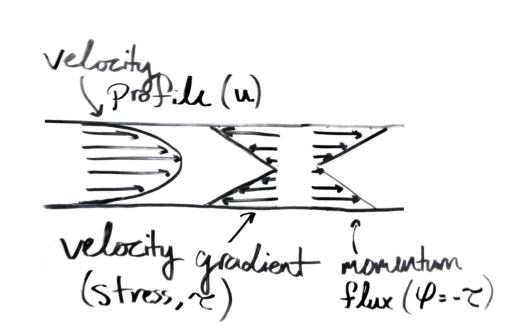

In [4]:
plt.imshow(plt.imread('Images/mtm_flux.jpg'))
plt.axis('off')
plt.show()

Notice how the highest \"concentration\" of velocity occurs at the
center of the pipe; this means the momentum flux is lowest at the center
since the gradient is zero. Conversely, the velocity \"concentration\"
is lowest at the pipe walls which corresponds to the flux being the
highest there. An alternative way to see this is that the momentum flux
being the highest at the wall means all of the velocity has \"escaped\"
from the wall, leaving no velocity. The momentum flux being the lowest
at the center means that there is no \"escape\" of velocity, thus giving
rise to the maximum velocity. Alternatively, viewing this in terms of
stress, there is the highest amount of stress at the wall and thus the
most amount of friction. This gives rise to the lowest velocity; the
opposite argument works for the center of the pipe which has the least
amount of friction. It is nice to get a good grasp of momentum flux and
stress; they are essentially the same thing since they are related by a
negative sign, but sometimes it is more natural to think of one concept
over the other.

For practical computations, it is best to organize the momentum flux
using matrices. If you are not familiar with matrix notation, it is
quick to learn through a Google search, here is a nice
[video](https://www.youtube.com/watch?v=q5GSY-YAM4w&ab_channel=LeslieGlen)
to review. In Cartesian coordinates, 

$$\ \nabla \mathbf{u}=
\nabla\begin{pmatrix}
    u_x\\
    u_y\\
    u_z\\
\end{pmatrix}
=
\begin{pmatrix}
    \nabla u_x\\
    \nabla u_y\\
    \nabla u_z\\
\end{pmatrix}
=
\begin{pmatrix}
    \ \displaystyle \frac{\displaystyle \partial^{}u_x}{\displaystyle \partial x ^{}} & \displaystyle \frac{\displaystyle \partial^{}u_x}{\displaystyle \partial y ^{}} & \displaystyle \frac{\displaystyle \partial^{}u_x}{\displaystyle \partial z ^{}}\ \\[10pt]
    \ \displaystyle \frac{\displaystyle \partial^{}u_y}{\displaystyle \partial x ^{}} & \displaystyle \frac{\displaystyle \partial^{}u_y}{\displaystyle \partial y ^{}} & \displaystyle \frac{\displaystyle \partial^{}u_y}{\displaystyle \partial z ^{}}\ \\[10pt]
    \ \displaystyle \frac{\displaystyle \partial^{}u_z}{\displaystyle \partial x ^{}} & \displaystyle \frac{\displaystyle \partial^{}u_z}{\displaystyle \partial y ^{}} & \displaystyle \frac{\displaystyle \partial^{}u_z}{\displaystyle \partial z ^{}}\ \\[10pt]
\end{pmatrix},$$

thus, adding this with the transpose of the $\nabla \mathbf{u}$ matrix, 

$$\ \boldsymbol{\tau}=\mu\begin{pmatrix}
    \ 2\displaystyle \frac{\displaystyle \partial^{}u_x}{\displaystyle \partial x ^{}} & \left(\displaystyle \frac{\displaystyle \partial^{}u_x}{\displaystyle \partial y ^{}}+\displaystyle \frac{\displaystyle \partial^{}u_y}{\displaystyle \partial x ^{}}\right) & \left(\displaystyle \frac{\displaystyle \partial^{}u_x}{\displaystyle \partial z ^{}}+\displaystyle \frac{\displaystyle \partial^{}u_z}{\displaystyle \partial x ^{}}\right)\ \\[10pt]
    \ \left(\displaystyle \frac{\displaystyle \partial^{}u_y}{\displaystyle \partial x ^{}}+\displaystyle \frac{\displaystyle \partial^{}u_x}{\displaystyle \partial y ^{}}\right) & 2\displaystyle \frac{\displaystyle \partial^{}u_y}{\displaystyle \partial y ^{}} & \left(\displaystyle \frac{\displaystyle \partial^{}u_y}{\displaystyle \partial z ^{}}+\displaystyle \frac{\displaystyle \partial^{}u_z}{\displaystyle \partial y ^{}}\right)\ \\[10pt]
    \ \left(\displaystyle \frac{\displaystyle \partial^{}u_z}{\displaystyle \partial x ^{}}+\displaystyle \frac{\displaystyle \partial^{}u_x}{\displaystyle \partial z ^{}}\right) & \left(\displaystyle \frac{\displaystyle \partial^{}u_z}{\displaystyle \partial y ^{}}+\displaystyle \frac{\displaystyle \partial^{}u_y}{\displaystyle \partial z ^{}}\right) & 2\displaystyle \frac{\displaystyle \partial^{}u_z}{\displaystyle \partial z ^{}}\ \\[10pt]
\end{pmatrix},$$ or component-wise,

$$\ \tau_{ij}=\mu\left(\displaystyle \frac{\displaystyle \partial^{}u_i}{\displaystyle \partial x_j ^{}}+\displaystyle \frac{\displaystyle \partial^{}u_j}{\displaystyle \partial x_i ^{}}\right), \quad \mathrm{for}\ i,j=x,y,\ \mathrm{or}\ z$$

\... a ghastly expression. Admittedly, the general case of Newton's Law
of Viscosity requires a lot of mathematical development to fully
justify. For those who are interested, this development is included in
Appendix 3 and is based on a more classical derivation from continuum
mechanics. For another classical derivation based on force balances,
consider this
[video](https://www.youtube.com/watch?v=uO_bW2zzrNU&ab_channel=BrianStorey),
paired with 10 minutes into this
[video](https://www.youtube.com/watch?v=O4J4M2K3Tq0&ab_channel=BrianStorey).
However, while these derivations are complete, the mathematical baggage
gets in the way of the physical interpretation: that stress is simply
the negative momentum flux. It is also important to remember the above
argument only works for an incompressible and Newtonian fluid. For the
compressible case, the $\boldsymbol{\tau}$ matrix changes.

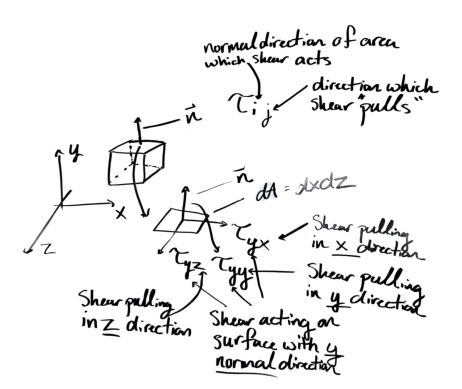

In [6]:
plt.imshow(plt.imread('Images\Stress_Tensor.jpg'))
plt.axis('off')
plt.show()

### Fourier's Law (Energy Transport)

For conservation of energy, we commonly describe the energy flux as heat
flux, $\mathbf{q}$, through Fourier's Law,

$$\ \boldsymbol{\varphi}=\mathbf{q}=-k\nabla T,$$ 

where $T$ is the temperature
of the medium. Development of this follows exactly the same argument as
Fick's Law. We expect that heat will flow from high to low temperatures,
meaning that the direction of heat flow is in the steepest descent
direction: the negative gradient. $k$ simply measures the tendency of
the heat to flow due to the temperature difference. Again, this simply
states that nature has a tendency to force highly concentrated energy
states to lower, distributed energy states. Can you come up with an
argument for *why* this distribution of energy happens on a microscopic
scale?

## Generation Equations

Generation equations are often much more unique to the specific system
being studied. Thus, only a few examples will be discussed and keep in
mind these examples are by no means comprehensive.

### Chemical Reactions (Mass Transport)

Suppose we have a simple reaction, $$\ aA + bB\to cC,$$ where $C$ is
generated. A simple model for generation is then given by kinetics,

$$\ \rho_C\mathbf{g}_C=kA^aB^b,$$ 

where $k$ is a rate constant. Notice
that this will lead to a system of coupled equations between $A$, $B$,
and $C$ since they are all changing in space and time and depend on each
other. This is just one example of a reaction term, but other reactions
often follow a similar structure by considering kinetics.

Another interesting example for mass transport is when one considers
neutron diffusion in a nuclear reactor in which case the conserved
quantity is the neutrons and the generation term becomes the neutron
source.

### Sum of Forces (Momentum Transport)

For momentum transport, the sum of forces acting at a point can be
modeled as the generation of momentum. That is,

$$\ \rho\mathbf{g}=\sum \mathbf{F},$$ where $\mathbf{F}$ represents the

force per volume. Some examples of possible $\mathbf{F}$'s:

$$\begin{aligned}
    &\text{Pressure:} \quad \mathbf{F}=-\nabla P\\
    &\\
    &\text{Gravity:} \quad \mathbf{F}=\rho\mathbf{G}
\end{aligned}$$ 

Why do we consider the pressure gradient and not the
absolute pressure? This is because the pressure acts in the normal
direction, $\mathbf{n}$, to the control volume. Mathematically,

$$\begin{aligned}
\mathrm{Pressure\ Force}&=-\iint_{\partial V}{P\mathbf{n} \, dA}\\
&=-\iiint_V{\nabla P \, dV}.
\end{aligned}$$ 

This simply states that the total pressure acting on the
[surface]{.underline} of the control volume (surface integral) is the
sum (volume integral) of the *changes* in pressure inside the control
volume. Or alternatively, the sum of *changes* in pressure inside the
control volume cancel each other out and leave only the total pressure
acting on the surface of the control volume. The volume integral is
eventually what turns into the $-\nabla P$ term.

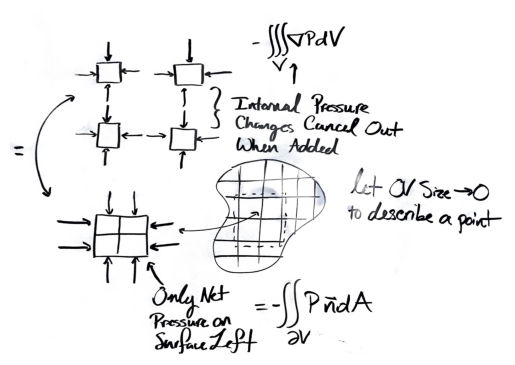

In [10]:
plt.imshow(plt.imread('Images\dP_CV.jpg'))
plt.axis('off')
plt.show()

### Heat and Work (Energy Transport)

Suppose we are heating our system at given points, $\mathbf{x}$, and at
given times, $t$, then the generation term simply becomes the heat
source at those points, $Q(\mathbf{x},t)$,

$$\ \rho\mathbf{g}_{heat}=Q(\mathbf{x},t).$$ 

We also have the shaft,
$PV$ (flow), and shear work which can also be viewed as generation
terms. It is best to first view these quantities in terms of their
integral forms and convert them to their differential terms. In the case
of the differential energy equation, the shaft work, $W_S$, is often
taken as 0 since it does not make sense to do shaft work at a point.
Thus, we are left with the flow and shear work, these terms arise from
flow through or along the *boundary* of the CV, and thus they are
represented by *surface* integrals. For the flow work,

$$\ \iint_{\partial V}{W_{PV} \, dA}=-\iint_{\partial V}{\frac{P}{\rho}\rho\mathbf{v}\cdot\mathbf{n} \, dA},$$

where $-P/\rho$ is the flow work per mass and the
$\rho\mathbf{v}\cdot\mathbf{n}dA$ is the differential mass flow rate
through the control volume. For the shear work, we must consider the
shear stress, $\boldsymbol{\tau}$ developed previously. To get the shear work,
we consider the shear force occurring at a differential area of the
control surface, $d\mathbf{F}=\boldsymbol{\tau}\cdot\mathbf{n}\,dA$. Remember
that work is a force times a distance, thus, to get the rate of work
done (power), we must dot the force with the velocity (distance/time).
Thus,

$$\ \mathbf{v}\cdot d\mathbf{F}=\mathbf{v}\cdot\boldsymbol{\tau}\cdot\mathbf{n}\,dA,$$

or by integrating,

$$\ \mathrm{Shear\ Work}=\iint_{\partial V}{\left(\mathbf{v}\cdot\boldsymbol{\tau}\right)\cdot\mathbf{n} \, dA}.$$

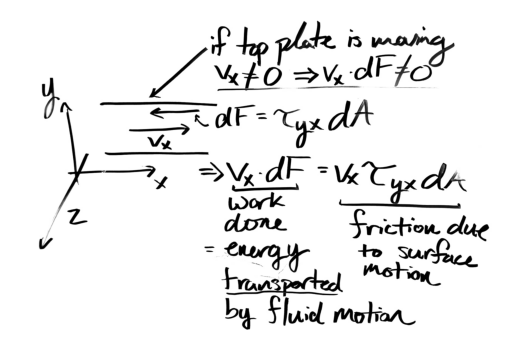

In [9]:
plt.imshow(plt.imread('Images\Shear_Work.jpg'))
plt.axis('off')
plt.show()

By applying the divergence theorem to the integral work terms and
letting the CV size go to 0, we get, 

$$\begin{aligned}
    &\mathrm{Flow\ Work}=-\nabla\cdot \left(\mathbf{v} P\right),\\
    &\mathrm{Shear\ Work}=\nabla\cdot \left(\mathbf{v}\cdot\boldsymbol{\tau}\right).
\end{aligned}$$ 

For the sake of completeness and for those who are
interested, for an incompressible Newtonian fluid, 

$$\begin{aligned}
    \mathrm{Shear\ Work}&=\mu\nabla\cdot \left(\mathbf{v}\cdot\left(\nabla \mathbf{v}+(\nabla \mathbf{v})^{\mathrm{T}}\right) \right)\\
    &=\mathrm{trace}\left(\mu\nabla \mathbf{v}\left[ \nabla \mathbf{v} + (\nabla \mathbf{v})^{\mathrm{T}} \right]\right)+\mu\mathbf{v}\cdot\nabla^2\mathbf{v},
\end{aligned}$$ 

where we define the viscous dissipation function,
$\Phi$, as,

$$\ \Phi=\mathrm{trace}\left(\mu\nabla \mathbf{v}\left[ \nabla \mathbf{v} + (\nabla \mathbf{v})^{\mathrm{T}} \right]\right).$$

Thus, the shear work becomes,

$$\ \mathrm{Shear\ Work}=\Phi+\mu\mathbf{v}\cdot\nabla^2\mathbf{v}.$$

When solving the transport equations by hand, the dissipation function,
$\Phi$, is often neglected as it is small and makes the equations
considerably harder to solve. It is also a subject geared more towards
an advanced continuum mechanics course and thus, for the purposes of
this document, it can simply be interpreted as the frictional energy
loss.